In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
data=pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
data=data.rename(columns={"N":"Nitrogen"})

In [32]:
data=data.rename(columns={"p":"Phospharus"})

In [33]:
data=data.rename(columns={"k":"Potassium"})

In [36]:
data.columns

Index(['Nitrogen', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label'],
      dtype='object')

In [37]:
data.shape

(2200, 8)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [39]:
data.isnull().sum()

Nitrogen       0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [40]:
data.drop_duplicates()

,Nitrogen,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [41]:
data.shape

(2200, 8)

In [43]:
print(len(columns))

8


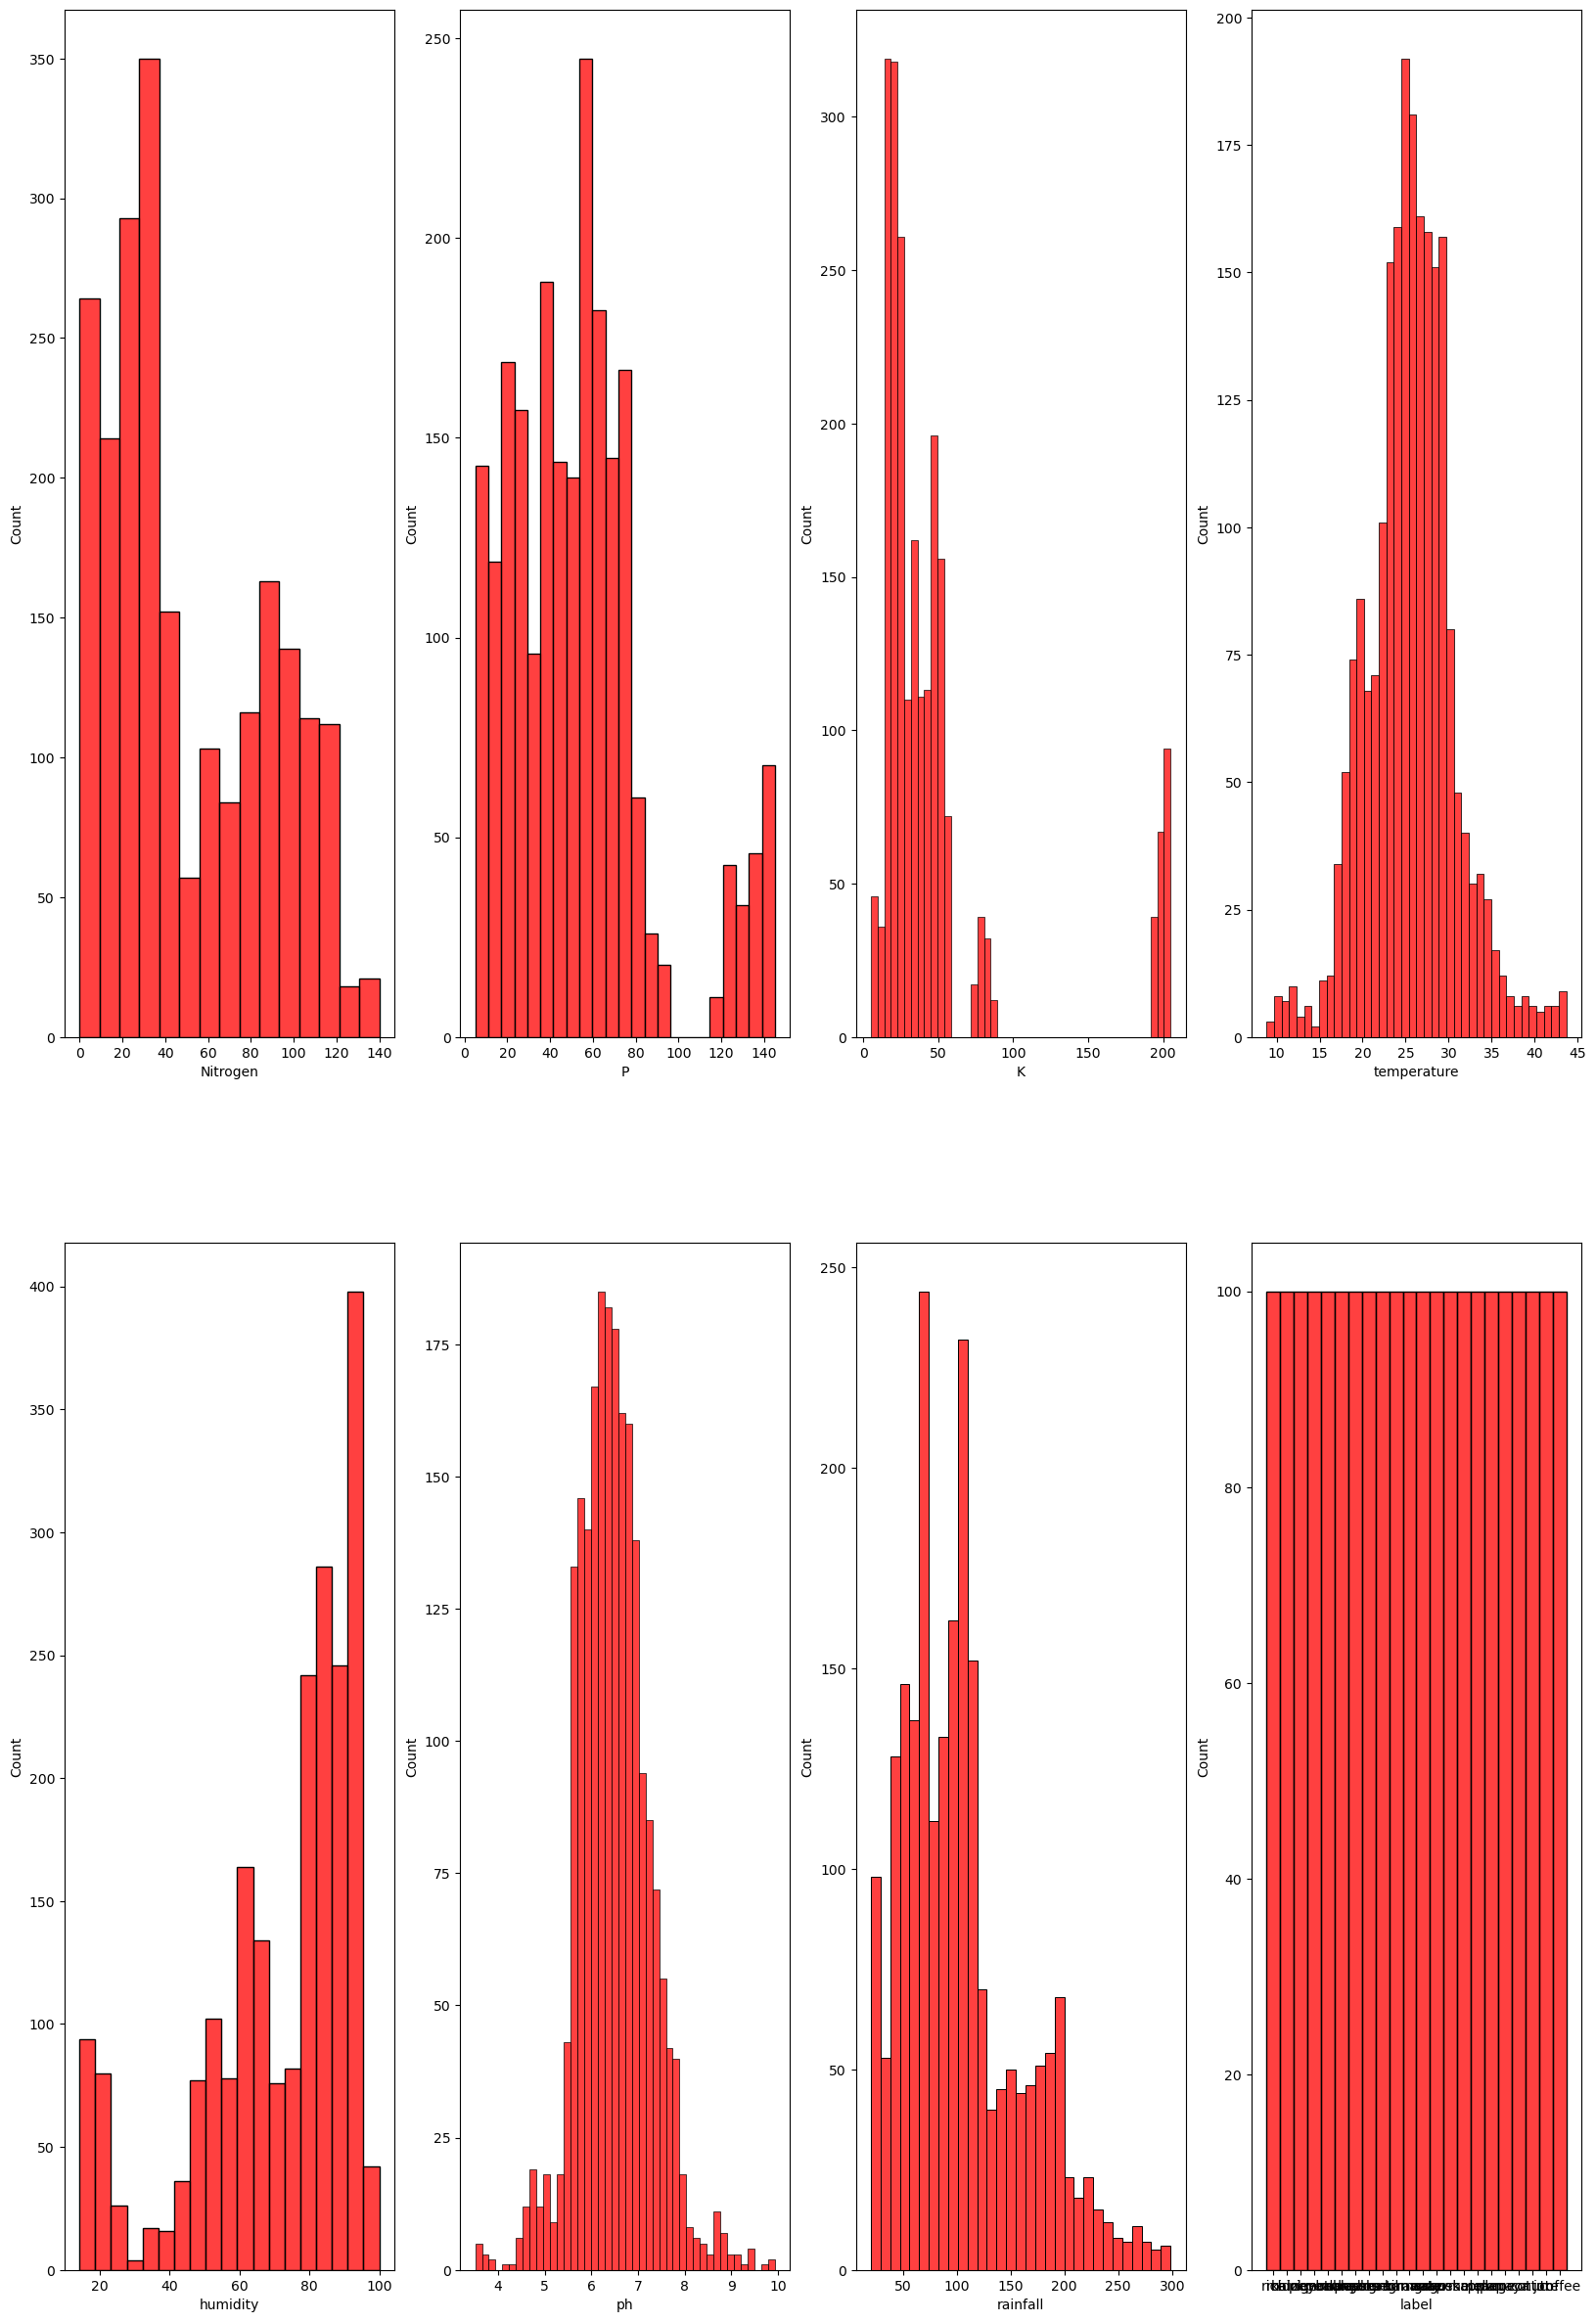

In [46]:
color=sns.color_palette("hls")
fig,ax1=plt.subplots(2,4,figsize=(20,30))
k=0
columns=list(data.columns)
for i in range(2):
  for j in range(4):
     sns.histplot(data[columns[k]],ax=ax1[i][j],color='red')
     k+=1
plt.show()

In [47]:
#apply log transform on the columns
data['temperature']=np.log(data['temperature'])
data['humidity']=np.log(data['humidity'])
data['ph']=np.log(data['ph'])
data['rainfall']=np.log(data['rainfall'])



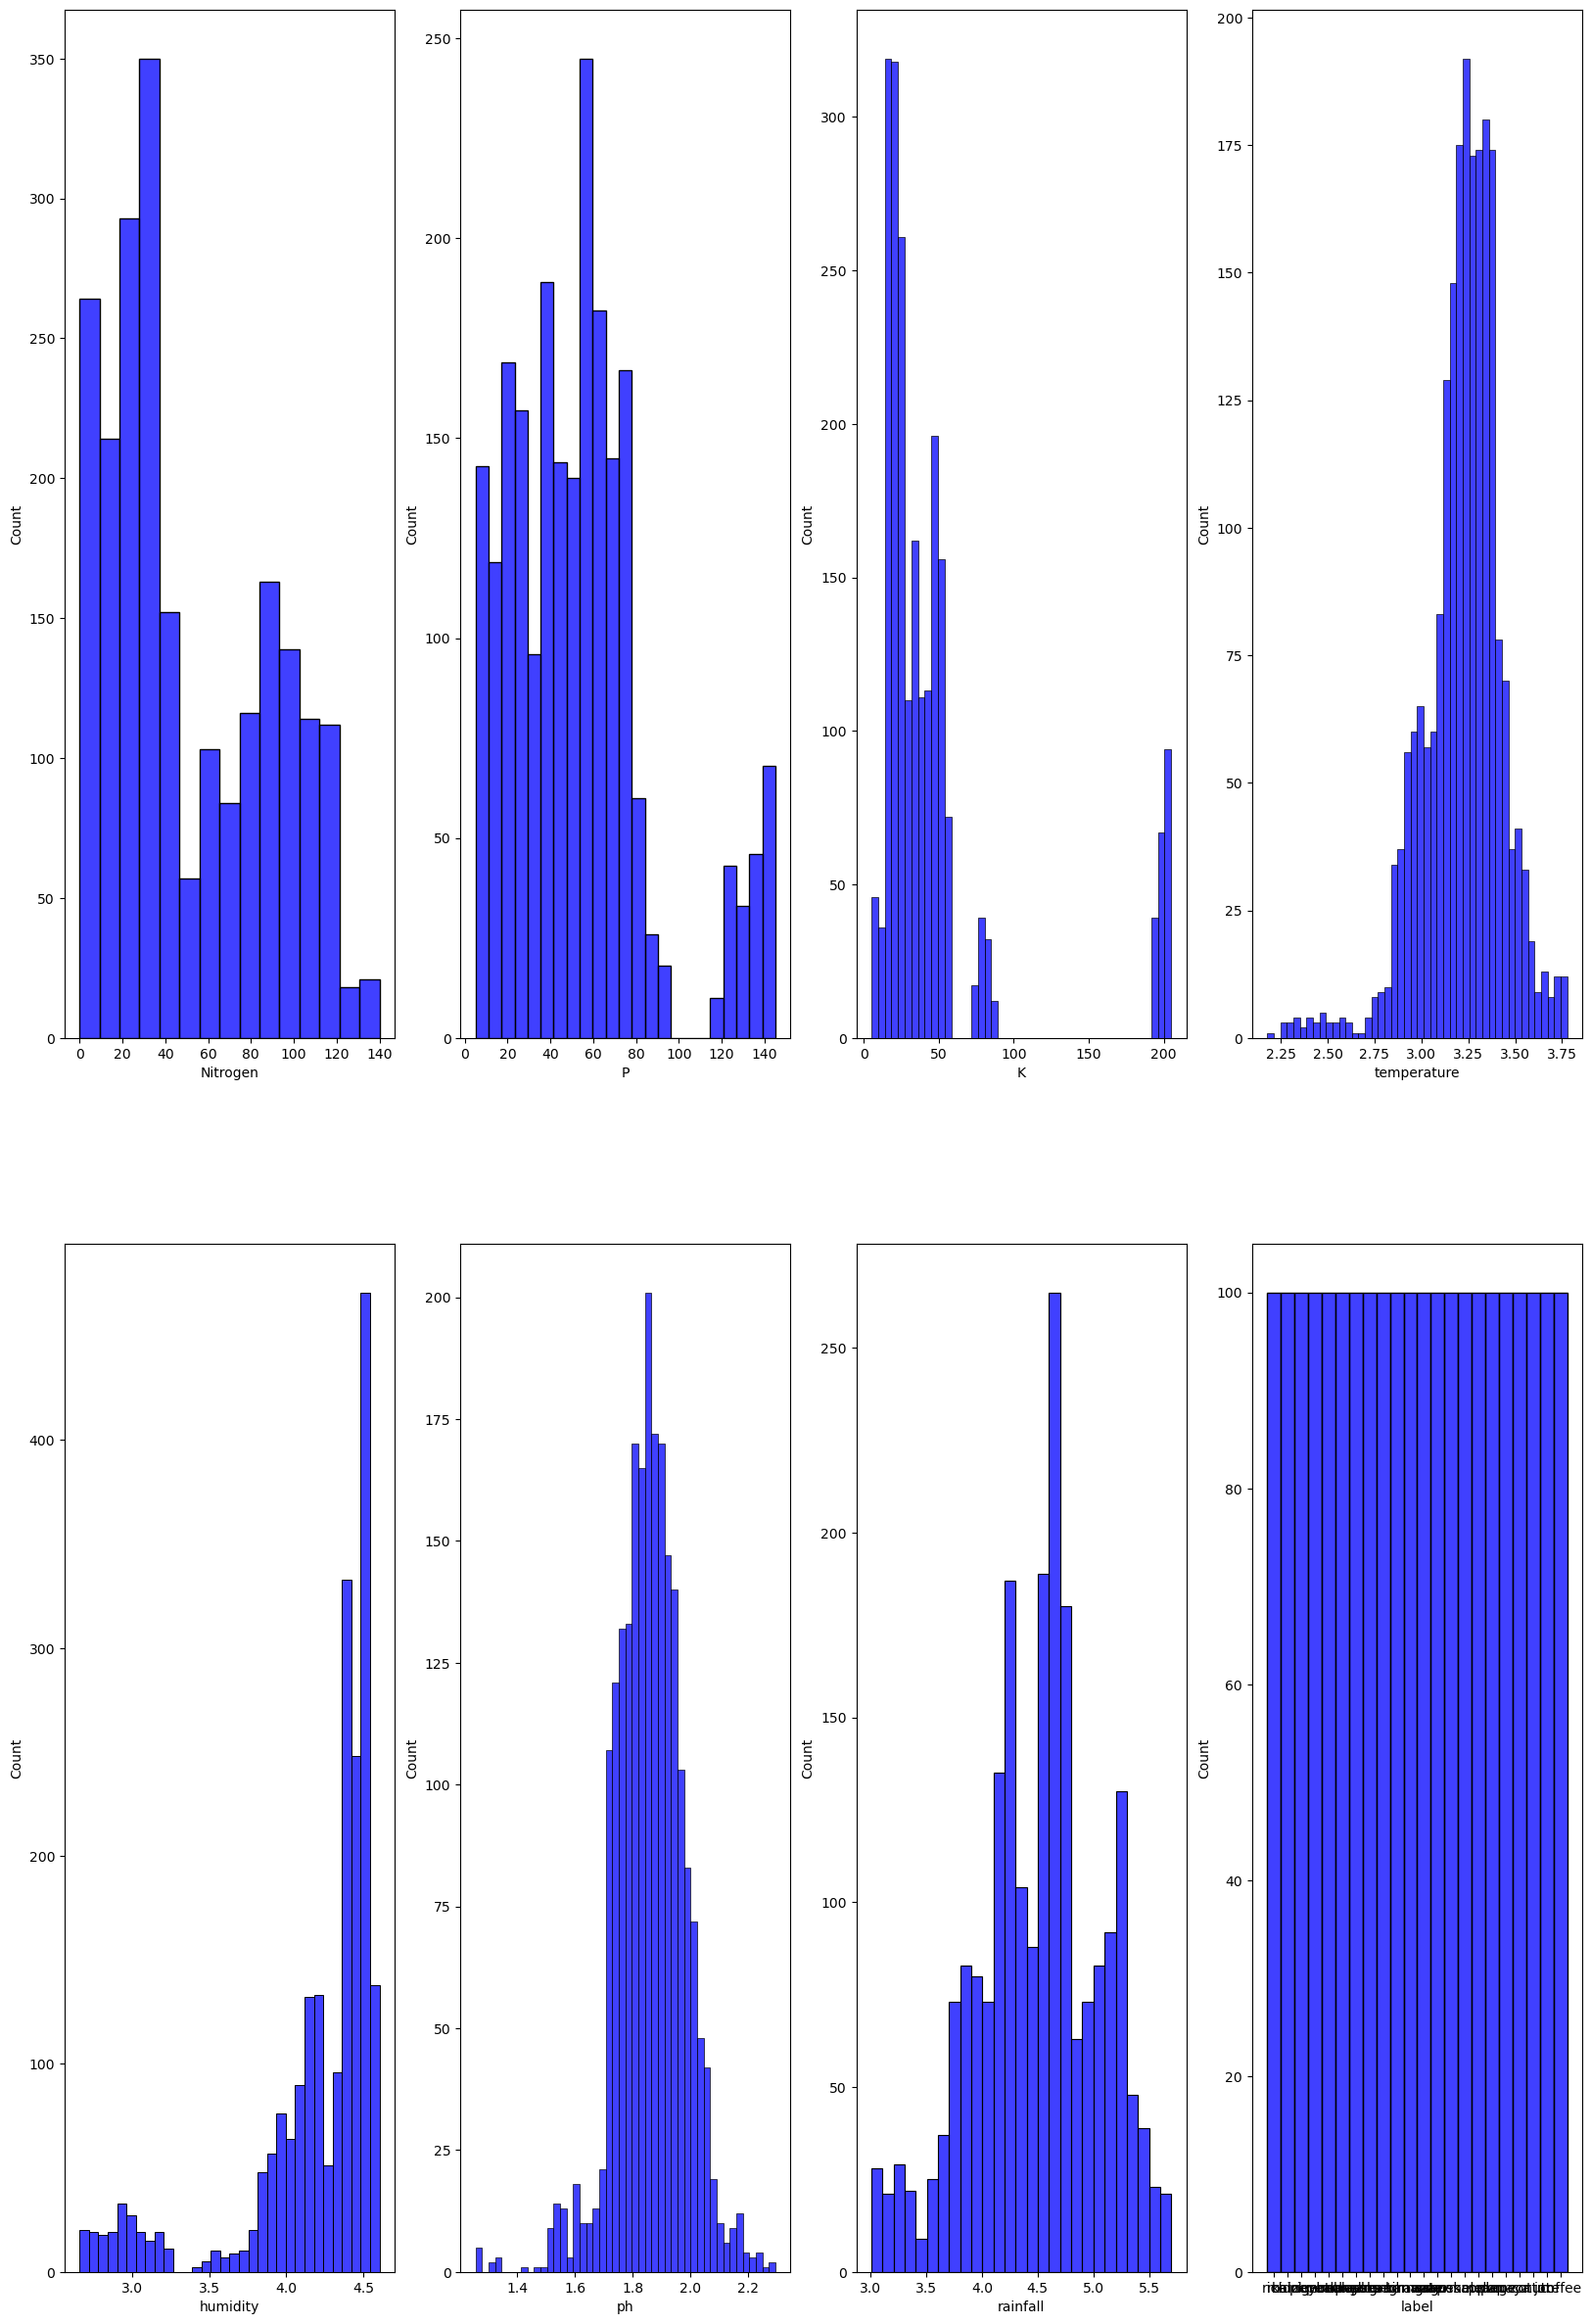

In [49]:
color=sns.color_palette("hls")
fig,ax1=plt.subplots(2,4,figsize=(20,30))
k=0
columns=list(data.columns)
for i in range(2):
  for j in range(4):
     sns.histplot(data[columns[k]],ax=ax1[i][j],color='blue')
     k+=1
plt.show()

In [52]:
x=data.drop('label',axis='columns')
x.head()

,Nitrogen,P,K,temperature,humidity,ph,rainfall
0,90,42,43,3.038779,4.406753,1.872261,5.312888
1,85,58,41,3.080554,4.386014,1.951338,5.423431
2,60,55,44,3.135688,4.410623,2.059265,5.575814
3,74,35,40,3.276809,4.384004,1.943106,5.492502
4,78,42,42,3.002220,4.401889,2.031888,5.571079


In [53]:
y=data['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [55]:
data['label'].count()

np.int64(2200)

In [56]:
data['label'].nunique()

22

In [57]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

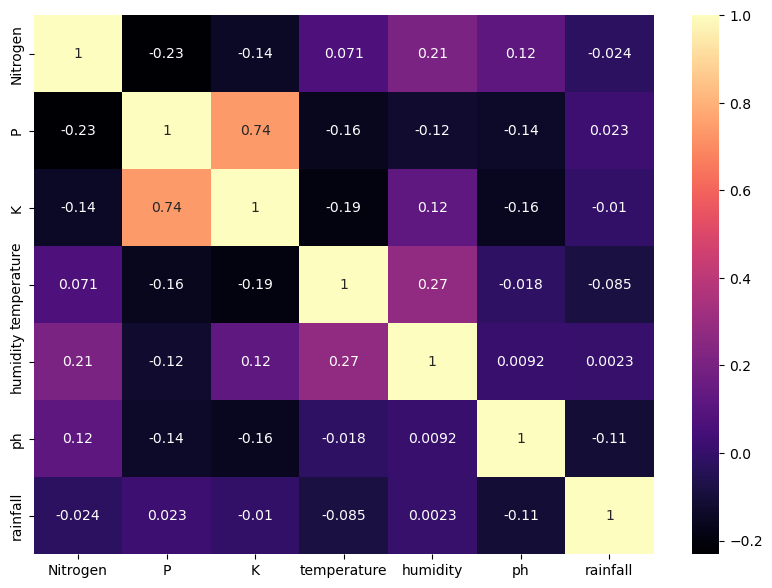

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(x.corr(),annot=True,cmap='magma')
plt.show()

train_test_split

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [81]:
#standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

SMOTE is used to handle imbalanced datasets.

In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train,y_train)
print("after SMOTE:",Counter(y_resampled))

after SMOTE: Counter({'cotton': 87, 'mungbean': 87, 'kidneybeans': 87, 'apple': 87, 'papaya': 87, 'jute': 87, 'pigeonpeas': 87, 'maize': 87, 'muskmelon': 87, 'coconut': 87, 'coffee': 87, 'mango': 87, 'blackgram': 87, 'grapes': 87, 'chickpea': 87, 'orange': 87, 'pomegranate': 87, 'lentil': 87, 'mothbeans': 87, 'rice': 87, 'banana': 87, 'watermelon': 87})


# We use classifiers to predict which category or class a data point belongs to.

# logistic regression
Logistic Regression is used because it predicts class probabilities and is simple, fast, and effective for classification problems.

In [63]:
from sklearn.linear_model import LogisticRegression
model_LogReg=LogisticRegression()
model_LogReg.fit(x_resampled,y_resampled)

LogisticRegression()

In [64]:
LR_pre=model_LogReg.predict(x_test)
from sklearn.metrics import accuracy_score
LR_acc=accuracy_score(y_test,LR_pre)
print("accuracy of logistic regression:",round(LR_acc*100))

accuracy of logistic regression: 67


# svm classifier

In [65]:
from sklearn.svm import SVC
model_SVM=SVC(kernel='linear')
model_SVM.fit(x_resampled,y_resampled)

SVC(kernel='linear')

In [66]:
SVC_pre=model_SVM.predict(x_test)
from sklearn.metrics import accuracy_score
svc_acc=accuracy_score(y_test,LR_pre)
print("accuracy of logistic regression:",round(svc_acc*100))

accuracy of logistic regression: 67


# Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(x_resampled,y_resampled)

DecisionTreeClassifier()

In [68]:
DT_pre=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score
DT_acc=accuracy_score(y_test,DT_pre)
print("accuracy of decision tree:",round(DT_acc*100))

accuracy of decision tree: 98


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier()
model_RF.fit(x_resampled,y_resampled)

RandomForestClassifier()

In [70]:
RF_pre=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score
RF_acc=accuracy_score(y_test,RF_pre)
print("accuracy of decision tree:",round(RF_acc*100))

accuracy of decision tree: 98


# kNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN= KNeighborsClassifier()
model_KNN.fit(x_resampled,y_resampled)


KNeighborsClassifier()

In [72]:
KNN_pre=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score
KNN_acc=accuracy_score(y_test,DT_pre)
print("accuracy of decision tree:",round(KNN_acc*100))

accuracy of decision tree: 98


I got 98 accuracy on decision tree,knn,random forest
i use random forest classifier because of
High accuracy

Handles multiclass very well

Less overfitting

No scaling needed

Works great on tabular data

# Confusion matrics for random forest

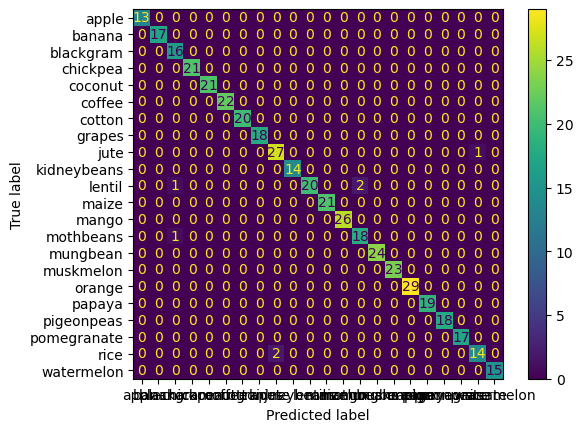

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,RF_pre)
cm_disp = ConfusionMatrixDisplay(cm, display_labels = model_RF.classes_)
cm_disp.plot()
plt.show()

# This is the barplot for different classifiers accuracy

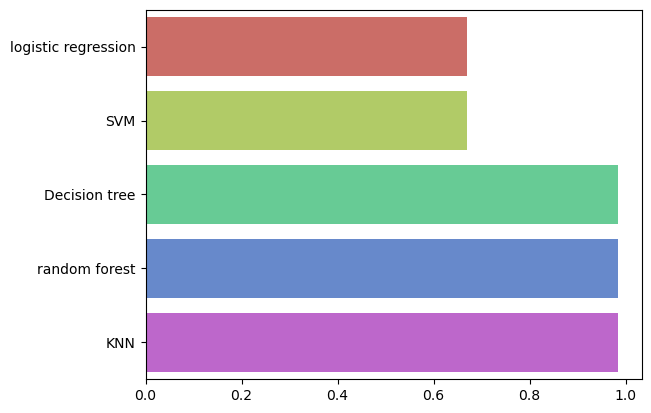

In [74]:
model=["logistic regression","SVM","Decision tree","random forest","KNN"]
accuracys=[LR_acc,svc_acc,DT_acc,RF_acc,KNN_acc]
sns.barplot(x=accuracys,y=model,palette='hls')
plt.show()

In [ ]:
#standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [85]:
import pickle
#save scalar parameters
filename="scaler.pkl"
pickle.dump(scaler,open(filename,"wb"))
#save model parameters
filename="RFmodel.pkl"
pickle.dump(model_RF,open(filename,"wb"))

In [ ]:
import numpy as np
import pickle

# Load saved model and scaler
with open("RFmodel.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# List of feature names in correct order
feature_names = ['Nitrogen', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       ]
# Collect input values from user
print("Enter the following details for prediction:")

user_values = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: "))
    user_values.append(val)

# Convert to array and reshape
input_data = np.array(user_values).reshape(1, -1)

# Scale using the fitted scaler
scaled_data = scaler.transform(input_data)

# Predict
prediction = model.predict(scaled_data)

print(f"\nPredicted Wine Quality: {prediction[0]}")
